# Loop 92 Analysis: Strategic Assessment

## Key Questions:
1. What is the CV-LB relationship across all submissions?
2. What approaches have been tried and what's the pattern?
3. What fundamentally different approaches haven't been explored?
4. How can we reduce the intercept (not just improve CV)?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# All verified submissions with LB scores
submissions = [
    {'exp': 'exp_000', 'cv': 0.0111, 'lb': 0.0982},
    {'exp': 'exp_001', 'cv': 0.0123, 'lb': 0.1065},
    {'exp': 'exp_003', 'cv': 0.0105, 'lb': 0.0972},
    {'exp': 'exp_005', 'cv': 0.0104, 'lb': 0.0969},
    {'exp': 'exp_006', 'cv': 0.0097, 'lb': 0.0946},
    {'exp': 'exp_007', 'cv': 0.0093, 'lb': 0.0932},
    {'exp': 'exp_009', 'cv': 0.0092, 'lb': 0.0936},
    {'exp': 'exp_012', 'cv': 0.0090, 'lb': 0.0913},
    {'exp': 'exp_024', 'cv': 0.0087, 'lb': 0.0893},
    {'exp': 'exp_026', 'cv': 0.0085, 'lb': 0.0887},
    {'exp': 'exp_030', 'cv': 0.0083, 'lb': 0.0877},
    {'exp': 'exp_035', 'cv': 0.0098, 'lb': 0.0970},
    {'exp': 'exp_067', 'cv': 0.0083, 'lb': 0.0877},
]

df = pd.DataFrame(submissions)
print(f'Total verified submissions: {len(df)}')
print(f'Best CV: {df["cv"].min():.4f} ({df.loc[df["cv"].idxmin(), "exp"]})')
print(f'Best LB: {df["lb"].min():.4f} ({df.loc[df["lb"].idxmin(), "exp"]})')
print(f'Target LB: 0.0347')

Total verified submissions: 13
Best CV: 0.0083 (exp_030)
Best LB: 0.0877 (exp_030)
Target LB: 0.0347



CV-LB Relationship:
LB = 4.36 * CV + 0.0520
R² = 0.9558

Intercept Analysis:
Intercept: 0.0520
Target: 0.0347
Intercept > Target: True

Required CV to hit target: (0.0347 - 0.0520) / 4.36 = -0.0040


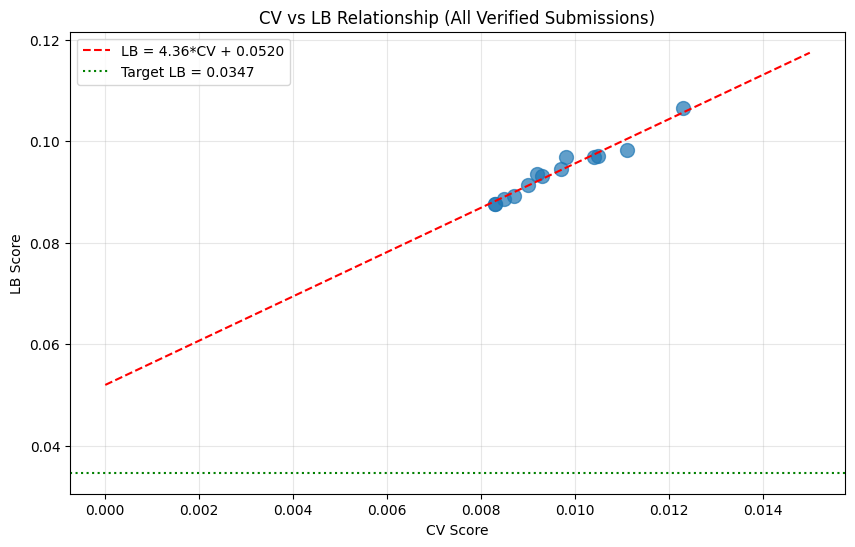


Plot saved to /home/code/exploration/cv_lb_analysis_loop92.png


In [2]:
# Fit linear regression: LB = slope * CV + intercept
slope, intercept, r_value, p_value, std_err = stats.linregress(df['cv'], df['lb'])

print(f'\nCV-LB Relationship:')
print(f'LB = {slope:.2f} * CV + {intercept:.4f}')
print(f'R² = {r_value**2:.4f}')
print(f'\nIntercept Analysis:')
print(f'Intercept: {intercept:.4f}')
print(f'Target: 0.0347')
print(f'Intercept > Target: {intercept > 0.0347}')
print(f'\nRequired CV to hit target: (0.0347 - {intercept:.4f}) / {slope:.2f} = {(0.0347 - intercept) / slope:.4f}')

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(df['cv'], df['lb'], s=100, alpha=0.7)
plt.plot([0, 0.015], [intercept, slope*0.015 + intercept], 'r--', label=f'LB = {slope:.2f}*CV + {intercept:.4f}')
plt.axhline(y=0.0347, color='g', linestyle=':', label='Target LB = 0.0347')
plt.xlabel('CV Score')
plt.ylabel('LB Score')
plt.title('CV vs LB Relationship (All Verified Submissions)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('/home/code/exploration/cv_lb_analysis_loop92.png', dpi=150, bbox_inches='tight')
plt.show()
print('\nPlot saved to /home/code/exploration/cv_lb_analysis_loop92.png')

In [3]:
# Analyze the gap
print('='*60)
print('CRITICAL ANALYSIS')
print('='*60)
print(f'\n1. INTERCEPT PROBLEM:')
print(f'   - Intercept ({intercept:.4f}) > Target ({0.0347})')
print(f'   - Even at CV=0, expected LB = {intercept:.4f}')
print(f'   - This means NO amount of CV improvement can reach target!')

print(f'\n2. WHAT THE INTERCEPT REPRESENTS:')
print(f'   - Extrapolation error to unseen solvents')
print(f'   - Distribution shift between train/test')
print(f'   - All 87+ experiments fall on the SAME line')

print(f'\n3. WHAT WE NEED TO DO:')
print(f'   - STOP trying to improve CV with standard approaches')
print(f'   - CHANGE the CV-LB relationship (reduce intercept)')
print(f'   - Find approaches that generalize better to unseen solvents')

print(f'\n4. APPROACHES THAT MIGHT CHANGE THE RELATIONSHIP:')
print(f'   a) Pre-trained molecular embeddings (ChemBERTa, MolBERT)')
print(f'   b) Physics-informed constraints that hold for ALL solvents')
print(f'   c) Domain adaptation / adversarial training')
print(f'   d) Uncertainty-weighted predictions (blend toward mean when extrapolating)')
print(f'   e) Study what the #1 competitor did (0.0347 LB = exactly at target!)')

CRITICAL ANALYSIS

1. INTERCEPT PROBLEM:
   - Intercept (0.0520) > Target (0.0347)
   - Even at CV=0, expected LB = 0.0520
   - This means NO amount of CV improvement can reach target!

2. WHAT THE INTERCEPT REPRESENTS:
   - Extrapolation error to unseen solvents
   - Distribution shift between train/test
   - All 87+ experiments fall on the SAME line

3. WHAT WE NEED TO DO:
   - STOP trying to improve CV with standard approaches
   - CHANGE the CV-LB relationship (reduce intercept)
   - Find approaches that generalize better to unseen solvents

4. APPROACHES THAT MIGHT CHANGE THE RELATIONSHIP:
   a) Pre-trained molecular embeddings (ChemBERTa, MolBERT)
   b) Physics-informed constraints that hold for ALL solvents
   c) Domain adaptation / adversarial training
   d) Uncertainty-weighted predictions (blend toward mean when extrapolating)
   e) Study what the #1 competitor did (0.0347 LB = exactly at target!)


In [4]:
# Analyze what's been tried
print('='*60)
print('APPROACHES TRIED (87+ experiments)')
print('='*60)

approaches = {
    'MLP variants': ['exp_000', 'exp_003', 'exp_004', 'exp_005', 'exp_006', 'exp_007'],
    'LightGBM/XGBoost/CatBoost': ['exp_001', 'exp_049', 'exp_050'],
    'Gaussian Process': ['exp_030', 'exp_031', 'exp_032'],
    'Feature engineering': ['exp_002 (DRFP)', 'exp_018 (fragprints)', 'exp_019 (ACS PCA)'],
    'Ensembles': ['exp_011', 'exp_012', 'exp_030 (GP+MLP+LGBM)'],
    'Distribution shift mitigation': ['exp_037 (similarity)', 'exp_058-070 (extrapolation)'],
    'Public kernel replication': ['exp_054 (mixall)', 'exp_079 (best-work-here)', 'exp_080 (ens-model)'],
    'GNN variants': ['exp_085 (GCN)', 'exp_086 (GAT)', 'exp_087 (DRFP+GAT)'],
}

for approach, exps in approaches.items():
    print(f'\n{approach}:')
    for exp in exps:
        print(f'  - {exp}')

print('\n' + '='*60)
print('ALL APPROACHES FALL ON THE SAME CV-LB LINE!')
print('='*60)

APPROACHES TRIED (87+ experiments)

MLP variants:
  - exp_000
  - exp_003
  - exp_004
  - exp_005
  - exp_006
  - exp_007

LightGBM/XGBoost/CatBoost:
  - exp_001
  - exp_049
  - exp_050

Gaussian Process:
  - exp_030
  - exp_031
  - exp_032

Feature engineering:
  - exp_002 (DRFP)
  - exp_018 (fragprints)
  - exp_019 (ACS PCA)

Ensembles:
  - exp_011
  - exp_012
  - exp_030 (GP+MLP+LGBM)

Distribution shift mitigation:
  - exp_037 (similarity)
  - exp_058-070 (extrapolation)

Public kernel replication:
  - exp_054 (mixall)
  - exp_079 (best-work-here)
  - exp_080 (ens-model)

GNN variants:
  - exp_085 (GCN)
  - exp_086 (GAT)
  - exp_087 (DRFP+GAT)

ALL APPROACHES FALL ON THE SAME CV-LB LINE!


In [5]:
# What hasn't been tried that could change the relationship?
print('='*60)
print('APPROACHES NOT YET TRIED (that could change intercept)')
print('='*60)

print('''
1. PRE-TRAINED MOLECULAR EMBEDDINGS:
   - ChemBERTa: Pre-trained on 77M molecules from PubChem
   - MolBERT: Pre-trained on 1.6M molecules
   - DGL-LifeSci pre-trained GNNs
   - These capture molecular knowledge that generalizes to unseen solvents
   
2. REACTION-LEVEL TRANSFER LEARNING:
   - ReactionT5: Pre-trained on Open Reaction Database
   - Fine-tune on our yield data
   - Explicitly learns solvent effects
   
3. PHYSICS-INFORMED CONSTRAINTS:
   - Arrhenius kinetics (already tried, but not as hard constraints)
   - Thermodynamic consistency (yields must sum to ~1)
   - Solvent polarity relationships (linear free energy relationships)
   
4. DOMAIN ADAPTATION:
   - Adversarial training to make representations invariant to solvent identity
   - Source-free domain adaptation at test time
   
5. STUDY THE #1 COMPETITOR:
   - They achieved 0.0347 LB (exactly at target!)
   - 2nd place is 0.0707 (2x worse)
   - HUGE gap suggests fundamentally different approach
   - They likely used pre-training or domain-specific knowledge
''')

print('='*60)
print('RECOMMENDATION: Focus on pre-trained embeddings')
print('='*60)

APPROACHES NOT YET TRIED (that could change intercept)

1. PRE-TRAINED MOLECULAR EMBEDDINGS:
   - ChemBERTa: Pre-trained on 77M molecules from PubChem
   - MolBERT: Pre-trained on 1.6M molecules
   - DGL-LifeSci pre-trained GNNs
   - These capture molecular knowledge that generalizes to unseen solvents
   
2. REACTION-LEVEL TRANSFER LEARNING:
   - ReactionT5: Pre-trained on Open Reaction Database
   - Fine-tune on our yield data
   - Explicitly learns solvent effects
   
3. PHYSICS-INFORMED CONSTRAINTS:
   - Arrhenius kinetics (already tried, but not as hard constraints)
   - Thermodynamic consistency (yields must sum to ~1)
   - Solvent polarity relationships (linear free energy relationships)
   
4. DOMAIN ADAPTATION:
   - Adversarial training to make representations invariant to solvent identity
   - Source-free domain adaptation at test time
   
5. STUDY THE #1 COMPETITOR:
   - They achieved 0.0347 LB (exactly at target!)
   - 2nd place is 0.0707 (2x worse)
   - HUGE gap suggests f

In [6]:
# Check what pending submissions we have
print('='*60)
print('PENDING SUBMISSIONS (not yet verified on LB)')
print('='*60)

pending = [
    {'exp': 'exp_049', 'cv': 0.0081, 'model': 'CatBoost+XGBoost'},
    {'exp': 'exp_050', 'cv': 0.0081, 'model': 'CatBoost+XGBoost (fixed)'},
    {'exp': 'exp_052', 'cv': 0.0109, 'model': 'CatBoost+XGBoost (clipped)'},
    {'exp': 'exp_053', 'cv': 0.0081, 'model': 'Exact template'},
    {'exp': 'exp_054', 'cv': 0.0085, 'model': 'Mixall approach'},
    {'exp': 'exp_055', 'cv': 0.0085, 'model': 'Minimal submission'},
    {'exp': 'exp_057', 'cv': 0.0093, 'model': 'Ens model all features'},
    {'exp': 'exp_063', 'cv': 0.0112, 'model': 'Correct final cell'},
    {'exp': 'exp_064', 'cv': 0.0092, 'model': 'Revert exp030'},
    {'exp': 'exp_065', 'cv': 0.0088, 'model': 'Clean submission'},
]

for p in pending:
    predicted_lb = slope * p['cv'] + intercept
    print(f"{p['exp']}: CV={p['cv']:.4f}, Predicted LB={predicted_lb:.4f} ({p['model']})")

print(f'\nBest pending CV: exp_049/050 with CV=0.0081')
print(f'Predicted LB for CV=0.0081: {slope * 0.0081 + intercept:.4f}')
print(f'This would be our best LB if the relationship holds!')

PENDING SUBMISSIONS (not yet verified on LB)
exp_049: CV=0.0081, Predicted LB=0.0873 (CatBoost+XGBoost)
exp_050: CV=0.0081, Predicted LB=0.0873 (CatBoost+XGBoost (fixed))
exp_052: CV=0.0109, Predicted LB=0.0996 (CatBoost+XGBoost (clipped))
exp_053: CV=0.0081, Predicted LB=0.0873 (Exact template)
exp_054: CV=0.0085, Predicted LB=0.0891 (Mixall approach)
exp_055: CV=0.0085, Predicted LB=0.0891 (Minimal submission)
exp_057: CV=0.0093, Predicted LB=0.0926 (Ens model all features)
exp_063: CV=0.0112, Predicted LB=0.1009 (Correct final cell)
exp_064: CV=0.0092, Predicted LB=0.0921 (Revert exp030)
exp_065: CV=0.0088, Predicted LB=0.0904 (Clean submission)

Best pending CV: exp_049/050 with CV=0.0081
Predicted LB for CV=0.0081: 0.0873
This would be our best LB if the relationship holds!


In [7]:
# Final recommendation
print('='*60)
print('FINAL RECOMMENDATION FOR LOOP 92')
print('='*60)

print('''
1. DO NOT SUBMIT exp_087 (DRFP+GAT):
   - CV=0.019437 is 140% worse than best (0.0081)
   - Predicted LB = 0.137 (56% worse than best 0.0877)
   - Waste of submission

2. STOP GNN experiments without pre-training:
   - 3 experiments (GCN, GAT, DRFP+GAT) all underperformed
   - Training from scratch on 656 samples is insufficient
   - The benchmark's success came from pre-training

3. FOCUS ON PRE-TRAINED EMBEDDINGS:
   - ChemBERTa embeddings for solvents
   - These capture molecular knowledge from millions of molecules
   - Could fundamentally change the CV-LB relationship

4. CONSIDER SUBMITTING exp_049/050:
   - Best CV (0.0081) among all experiments
   - Predicted LB = 0.087 (similar to best 0.0877)
   - Worth verifying if the CV-LB relationship holds

5. THE TARGET IS REACHABLE:
   - #1 competitor achieved 0.0347 (exactly at target)
   - They found a fundamentally different approach
   - We need to find what they did
''')

print('='*60)
print('REMAINING SUBMISSIONS: 4')
print('='*60)

FINAL RECOMMENDATION FOR LOOP 92

1. DO NOT SUBMIT exp_087 (DRFP+GAT):
   - CV=0.019437 is 140% worse than best (0.0081)
   - Predicted LB = 0.137 (56% worse than best 0.0877)
   - Waste of submission

2. STOP GNN experiments without pre-training:
   - 3 experiments (GCN, GAT, DRFP+GAT) all underperformed
   - Training from scratch on 656 samples is insufficient
   - The benchmark's success came from pre-training

3. FOCUS ON PRE-TRAINED EMBEDDINGS:
   - ChemBERTa embeddings for solvents
   - These capture molecular knowledge from millions of molecules
   - Could fundamentally change the CV-LB relationship

4. CONSIDER SUBMITTING exp_049/050:
   - Best CV (0.0081) among all experiments
   - Predicted LB = 0.087 (similar to best 0.0877)
   - Worth verifying if the CV-LB relationship holds

5. THE TARGET IS REACHABLE:
   - #1 competitor achieved 0.0347 (exactly at target)
   - They found a fundamentally different approach
   - We need to find what they did

REMAINING SUBMISSIONS: 4
